<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1">Data Preprocessing</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#What-is-the-login-frequency-distributed-over-entier-time-frame-and-by-month?" data-toc-modified-id="What-is-the-login-frequency-distributed-over-entier-time-frame-and-by-month?-2.1">What is the login frequency distributed over entier time frame and by month?</a></span></li><li><span><a href="#What-is-the-login-frequency-breakdown-by-day-of-week?" data-toc-modified-id="What-is-the-login-frequency-breakdown-by-day-of-week?-2.2">What is the login frequency breakdown by day of week?</a></span></li><li><span><a href="#What-is-the-login-frequency-breakdown-by-hour?" data-toc-modified-id="What-is-the-login-frequency-breakdown-by-hour?-2.3">What is the login frequency breakdown by hour?</a></span></li></ul></li><li><span><a href="#Observations:" data-toc-modified-id="Observations:-3">Observations:</a></span><ul class="toc-item"><li><span><a href="#1.-What-would-you-choose-as-the-key-measure-of-success-of-this-experiment-in-encouraging-driver-partners-to-serve-both-cities,-and-why-would-you-choose-this-metric?" data-toc-modified-id="1.-What-would-you-choose-as-the-key-measure-of-success-of-this-experiment-in-encouraging-driver-partners-to-serve-both-cities,-and-why-would-you-choose-this-metric?-3.1">1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</a></span></li><li><span><a href="#2.-Describe-a-practical-experiment-you-would-design-to-compare-the-effectiveness-of-the-proposed-change-in-relation-to-the-key-measure-of-success.-Please-provide-adetails-on" data-toc-modified-id="2.-Describe-a-practical-experiment-you-would-design-to-compare-the-effectiveness-of-the-proposed-change-in-relation-to-the-key-measure-of-success.-Please-provide-adetails-on-3.2">2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide adetails on</a></span></li></ul></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-4">Data Description</a></span></li><li><span><a href="#Data-Cleaning-and-Wrangling" data-toc-modified-id="Data-Cleaning-and-Wrangling-5">Data Cleaning and Wrangling</a></span></li><li><span><a href="#Data-Exploratory-Analysis" data-toc-modified-id="Data-Exploratory-Analysis-6">Data Exploratory Analysis</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7">Modeling</a></span></li></ul></div>

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious company to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

# Part 1: Exploratory Data Analysis for Time Series Data

The dataset contains (simulated) timestamps of user logins in a particular geographic location. Aggregage these login counts based on 15-minute time intervals and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

### Data Preprocessing

In [1]:
# import modules
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load json data into a DataFrame
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# quick examination on the dataset
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


- The dataset contains 93,142 rows of login history from 1970-01-01 to 1970-04-13. No missing values observed. Though there are duplicate data, considering that it is highly possible for multiple users to log in their accounts at the exact same time, so no rows are dropped.

In [5]:
# aggregate login gounts based on 15-mins time intervals
logins['count'] = 1
logins = logins.set_index('login_time') # get datetime index to prepare for resampling 
logins = logins.resample('15T').sum()
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Exploratory Data Analysis

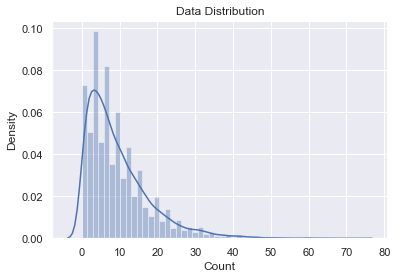

In [6]:
# plot histogram to examine data distribution
ax = sns.distplot(logins)
_ = ax.set_title('Data Distribution')
_ = ax.set_xlabel('Count')
_ = ax.set_ylabel('Density')

#### What is the login frequency distributed over entier time frame and by month?

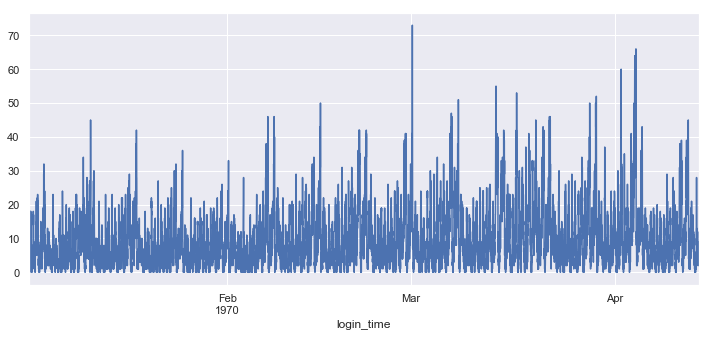

In [7]:
logins.plot(figsize=(12, 5), legend = False)

# why Jan is not showing

In [8]:
# extract datetime feature
logins['month'] = logins.index.month_name()
logins['dayofweek'] = logins.index.dayofweek
logins['hour'] = logins.index.hour

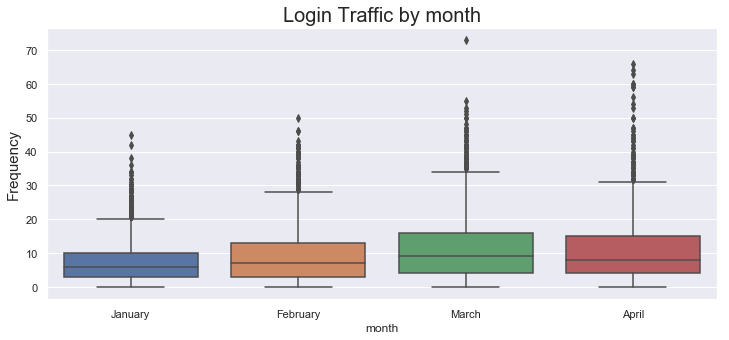

In [9]:
# boxplot
plt.figure(figsize = (12, 5))
ax = sns.boxplot(x = 'month', y = 'count', data = logins)
_ = ax.set_title('Login Traffic by month', fontsize = 20)
_ = ax.set_ylabel('Frequency', fontsize = 15)

#### What is the login frequency breakdown by day of week?

In [10]:
# group rows by month and day of week to count frequency
day_of_week_per_month = logins.groupby(['month','dayofweek']).sum().unstack('month')['count']
# sort the dataframe
day_of_week_per_month = day_of_week_per_month.loc[[0,1,2,3,4,5,6]]

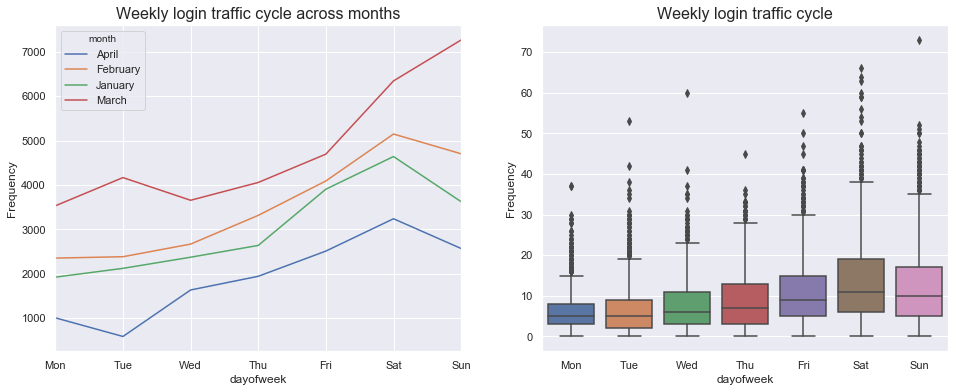

In [11]:
# weekly cycle across four months
plt.figure(figsize = (16, 6))
order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax1 = plt.subplot(1,2,1)
day_of_week_per_month.plot(ax = ax1)
_ = ax1.set_title('Weekly login traffic cycle across months', fontsize = 16)
_ = ax1.set_ylabel('Frequency', fontsize = 12)
_ = ax1.set_xticklabels(order)

# summarize weekly cycle
ax2 = plt.subplot(1,2,2)
sns.boxplot(x = 'dayofweek', y = 'count', data = logins, ax = ax2)
_ = ax2.set_title('Weekly login traffic cycle', fontsize = 16)
_ = ax2.set_ylabel('Frequency', fontsize = 12)
_ = ax2.set_xticklabels(order)

#### What is the login frequency breakdown by hour?

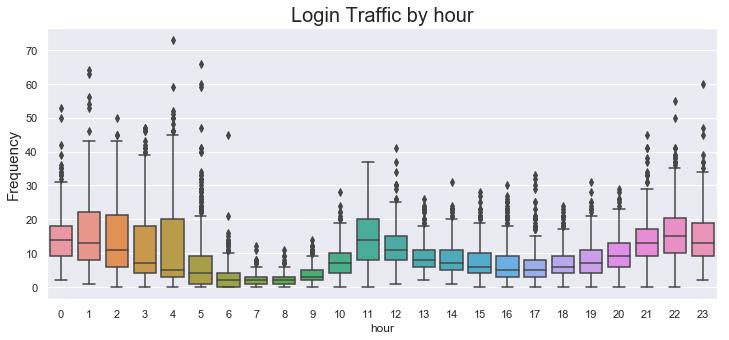

In [12]:
logins['hour'] = logins.index.hour
# boxplot
plt.figure(figsize = (12, 5))
ax = sns.boxplot(x = 'hour', y = 'count', data = logins)
_ = ax.set_title('Login Traffic by hour', fontsize = 20)
_ = ax.set_ylabel('Frequency', fontsize = 15)

### Observations:
- Login count at 15-minute intervals show similar patterns across month, shown in montly line chart and boxplot.
- From weekly perspective, the trend starts to increase from Thursday and achieve the peak on Saturday. The median values of weekends are higher than those of weekdays. It might suggest that the users are likely use Ultimate bikes on weekends for travling instead of weekday commuting.
- From hourly perspective, the frequency shows two peaks, one is in the noon period from 10 am to 12 pm and another is at night from 9 pm to 12 am.

# Part 2: Experiment and Metrics Design 

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**Metric**
- The goal is to encourage driver partners from one city to commute across the bridge to serve the other city. Average number of outbound trips across the bridge per week is my proposed metric to evaluate whether reimbursing toll costs encourage driver partners increase their chances to be available in both cities. 

**Rationale**
- Number of outbound trips, which means Gotham drivers travel to Metropolis or Metropolis drivers to Gotham, are considered valid data. Because we can track if drivers are more likely to leave their hometown and make themselves available in the other city. Calculating the number of inbound trips doesn't add new information.
- We take the weekly average number in order to reduce the influence of timing. The traffic on different day of the week might affect the number of travles. 

In [13]:
# question to think: do we need to consider the active period in Gotham and Metorpolis?

#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide adetails on

**Experiment Method**
- Hypothesis testing with paried t-test is suggested to use. The null hypothesis is that reimbursement policy does not change how people commute between two cities, and thus the number of outbound travles before the policy should be the same as the number after the policy. While, the alternative hypothesis is that reimbursement changes people's behaviors, the number of outbound travles should be different before and after the policy executes. 

**How to execute the experiment**
- Selecting the significance level: Significance level is the probability with which we may reject a null hypothesis. Common alpha value 0.05 is used.
- Sampling: The participants are randomly and independently selected.

**Interpretation the experiment result**
- We use the p-value to see if the test is significant. If p-value is small, it indicates that the result(observable difference) is unlikely to happen by chance alone, so the hypothesis that reimbursement makes no difference is rejected. Then we know that the policy change people's commuting behaviors.

# Part 3: Predictive Modeling for User Retention

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

### Data Description

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

- location 
-- city
- pricing 
-- surge_pct
-- avg_surge
- frequency
-- trips_in_first_30_days
-- avg_dist
-- weekday_pct

### Data Cleaning and Wrangling

In [14]:
# load the dataset
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
# take a quick look of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


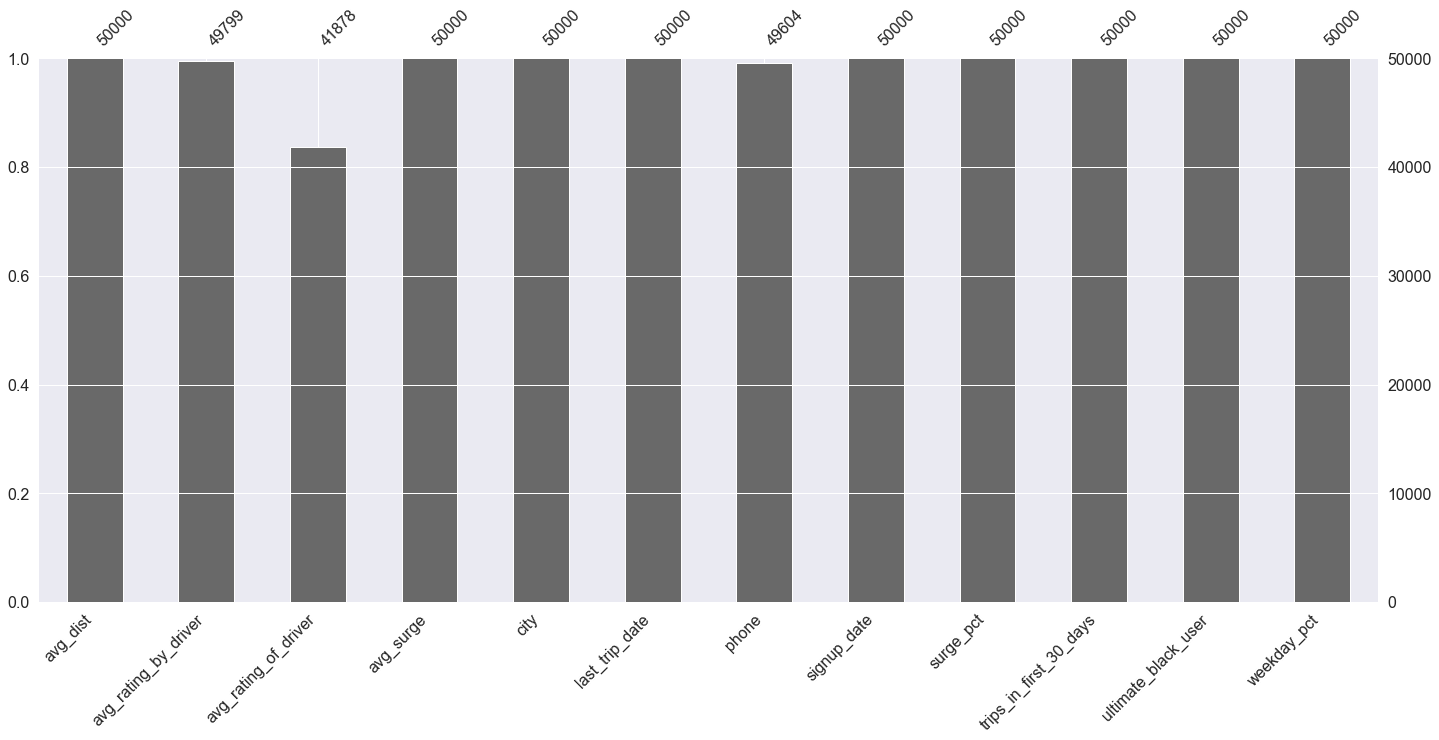

In [16]:
# missing values
import missingno as msno
msno.bar(df)

**columns with missing values**
- avg_rating_of_driver

In [17]:
# conver data type
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [18]:
# create the target variable: retained (if users take a trip in the preceding 30 days are considered valid)

# compute the most recent date
last_day = max(df['last_trip_date'])
cut_off = last_day - pd.Timedelta('30 days')
print ('The data is collected at {} and the cut of date is {}'.format(last_day,cut_off))

# check if a user uses the service in the preceding 30 days, valid user assign 1 and invalid assign 0
df['retained'] = df['last_trip_date'].apply(lambda x: True if x >= cut_off else False)
df['retained'] = df['retained'].astype(int)

The data is collected at 2014-07-01 00:00:00 and the cut of date is 2014-06-01 00:00:00


In [19]:
# evaluate the distribution of active and non-active user
active = df[df['retained'] == 1]
non_active = df[df['retained'] == 0]
active_perc = len(active)/ df.shape[0]
nonactive_perc = len(non_active)/ df.shape[0]
print ('The percentage of active users is {}, and the percentage of non-active users is {}'.format(active_perc, nonactive_perc))

The percentage of active users is 0.37608, and the percentage of non-active users is 0.62392


### Data Exploratory Analysis

- location 
-- city
- pricing 
-- surge_pct
-- avg_surge
- frequency
-- trips_in_first_30_days
-- avg_dist
-- weekday_pct

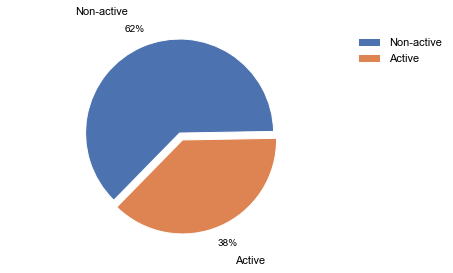

In [20]:
# The distribution of non-active and active users
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['text.color'] = 'black'

fig, ax = plt.subplots()
percentages = [nonactive_perc, active_perc]
labels = ['Non-active',  'Active']
explode=(0.08,0)
ax.pie(percentages, explode = explode, labels = labels,  
       autopct='%1.0f%%', 
       shadow = False, startangle=1,   
       pctdistance = 1.2,labeldistance = 1.4)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(frameon= False, bbox_to_anchor = (1,1))

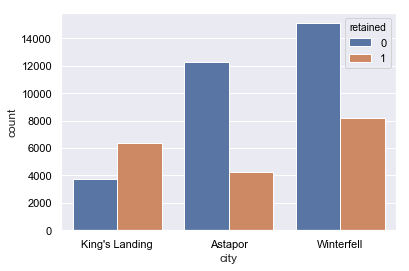

In [21]:
# the influence of different cities
sns.countplot(x='city', data= df, hue='retained')

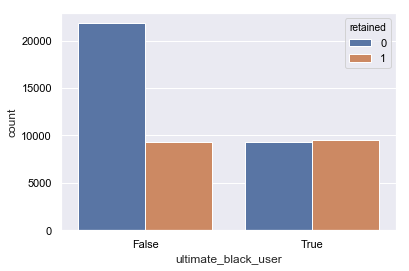

In [22]:
# the influence of user type
sns.countplot(x= 'ultimate_black_user', data=df, hue='retained')

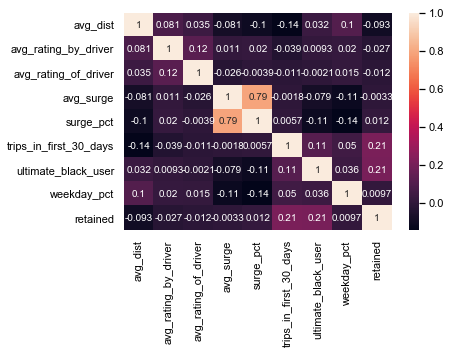

In [23]:
sns.heatmap(df.corr(),annot=True);

### Modeling

In [24]:
# one hot encoding
city = pd.get_dummies(df.city, drop_first=True)
phone = pd.get_dummies(df.phone, drop_first=True)
df.ultimate_black_user = (df.ultimate_black_user).astype(int)
df.drop(['last_trip_date', 'signup_date', 'city', 'phone'], axis=1, inplace=True)
df = df.join([city, phone])
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,King's Landing,Winterfell,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,0


In [25]:
# fill na value
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [26]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'retained')
Y = df['retained']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [27]:
# logistica regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = lr.predict(X_test)
print (accuracy_score(y_pred, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7221


In [28]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test)
print (accuracy_score(y_pred, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7475
